# Câncer da mama

In [1]:
from IPython.display import Image, display

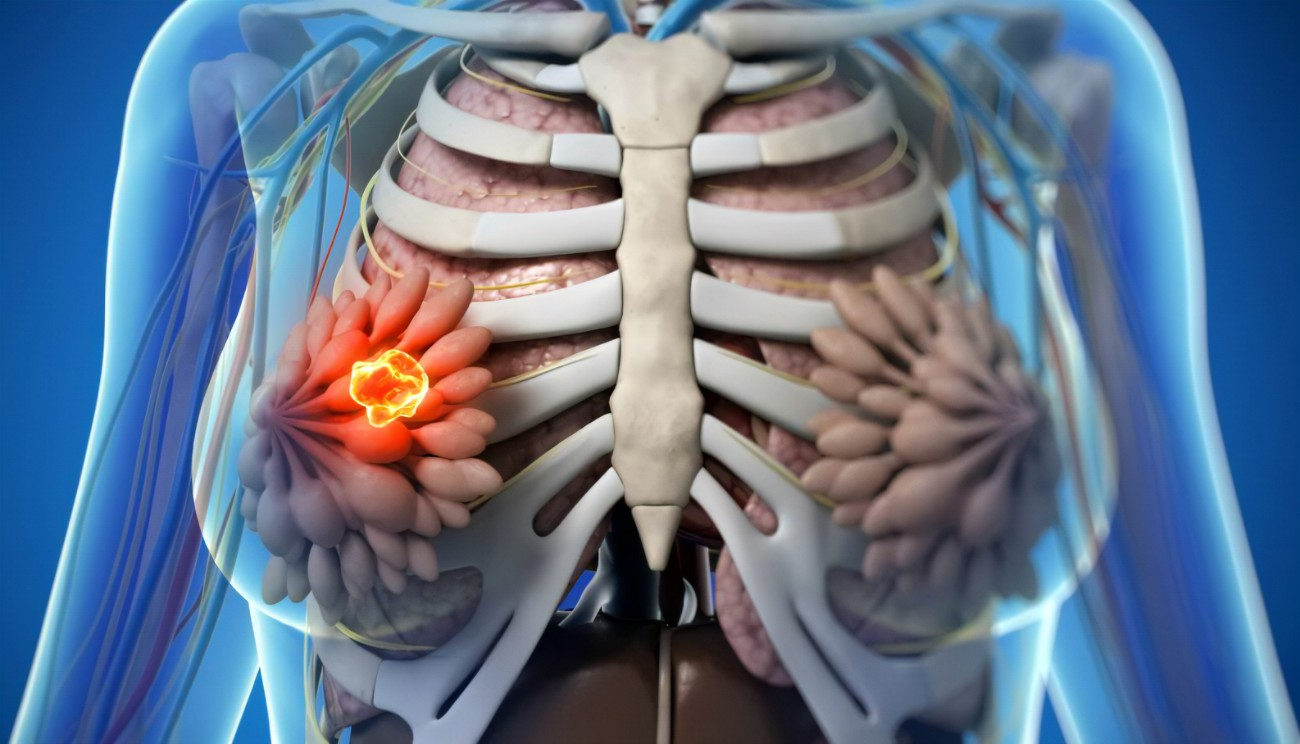

In [2]:
display(Image(filename='cancer.jpeg',  height=300))

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# Importando os dados
df = pd.read_csv('data.csv')

In [109]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análise Exploratória

In [110]:
df.shape # Visualizando o número de colunas e linhas

(569, 32)

In [111]:
df.info() # Analisando os tipos dos dados e valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [112]:
df.isna().sum() # Não existe valores nulos

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [113]:
df.describe() # Análise descritiva dos dados

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Tratando os Dados Categóricos

In [114]:
df = df.drop('id', axis=1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

# Identificando Outliers Na Base Com o Método da Distância Interquartil


In [115]:
q1 = df['radius_mean'].quantile(0.25)
q3 = df['radius_mean'].quantile(0.75)
IQR = q3 - q1

In [116]:
df[df['radius_mean'] > q3 + (IQR * 1.5)] # Todo valor maior que a soma do quartil 3 com o produto do IQR com 1.5 são outliers 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
82,1,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,1,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,1,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,1,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,1,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,1,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,1,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,1,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,1,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,1,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [117]:
df = df[df['radius_mean'] < q3 + (IQR * 1.5)] # Base sem os outliers

In [118]:
df.shape

(555, 31)

In [119]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

# Seleção de Recursos da Base(Feature Selection)

In [120]:
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [121]:
estimador= Lasso(alpha=0.005, random_state=0) # Estimador para fazer a seleção das feature mais importantes
seletor = SelectFromModel(estimator=estimador, max_features=8) # Seletor da base criado

In [122]:
seletor.fit(X, y) # Treinando o seletor

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e-01, tolerance: 1.274e-02
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0), max_features=8)

In [123]:
seletor_feats = X.columns[(seletor.get_support())]

In [124]:
X = X[seletor_feats]

In [125]:
X

,radius_mean,texture_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,concavity_worst
0,17.99,10.38,1001.0,153.40,25.380,17.33,184.60,0.7119
1,20.57,17.77,1326.0,74.08,24.990,23.41,158.80,0.2416
2,19.69,21.25,1203.0,94.03,23.570,25.53,152.50,0.4504
3,11.42,20.38,386.1,27.23,14.910,26.50,98.87,0.6869
4,20.29,14.34,1297.0,94.44,22.540,16.67,152.20,0.4000
...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,158.70,25.450,26.40,166.10,0.4107
565,20.13,28.25,1261.0,99.04,23.690,38.25,155.00,0.3215
566,16.60,28.08,858.1,48.55,18.980,34.12,126.70,0.3403
567,20.60,29.33,1265.0,86.22,25.740,39.42,184.60,0.9387


In [126]:
seletor.estimator_.coef_ # Coeficiente de importância das feature

array([-0.16333879, -0.00537629,  0.        ,  0.00139857,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.00215441,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.16538019,  0.01515568,  0.00807637, -0.00125863,  0.        ,
        0.        ,  0.31055237,  0.        ,  0.        ,  0.        ])

In [127]:
X.describe()

,radius_mean,texture_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,concavity_worst
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,13.865223,19.213838,624.199820,36.266645,15.926431,25.613892,104.793928,0.264748
std,3.137897,4.302203,293.394356,30.835355,4.354652,6.168415,30.005691,0.204151
min,6.981000,9.710000,143.500000,6.802000,7.930000,12.020000,50.410000,0.000000
25%,11.665000,16.110000,416.700000,17.740000,12.980000,21.005000,83.875000,0.110900
50%,13.240000,18.770000,541.600000,24.190000,14.850000,25.270000,97.110000,0.221600
75%,15.495000,21.680000,746.050000,43.450000,18.085000,29.485000,122.250000,0.375700
max,21.750000,39.280000,1546.000000,224.100000,32.490000,49.540000,214.000000,1.252000


# Modelos Para a Classificação

In [128]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [129]:
# Padronizando os dados
norm = StandardScaler()

In [130]:
X_norm = norm.fit_transform(X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2) # Separando a base em treino e teste

In [132]:
xgb_classifier=XGBClassifier(n_estimators=1000, random_state=0) # Primeiro modelo

In [133]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [134]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [135]:
# Metricas de Avaliação do modelo
XGBoost_acuracia = accuracy_score(y_test, xgb_classifier.predict(X_test)) * 100
XGBoost_precisao =  precision_score(y_test, xgb_classifier.predict(X_test)) * 100
XGBoost_recall = recall_score(y_test, xgb_classifier.predict(X_test)) * 100

In [136]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=500, min_samples_leaf=2) # Segundo modelo

In [137]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [138]:
# Metricas de Avaliação do segundo modelo
RandomForest_acuracia = accuracy_score(y_test, clf.predict(X_test)) * 100
RandomForest_precisao = precision_score(y_test, clf.predict(X_test)) * 100
RandomForest_recall = recall_score(y_test, clf.predict(X_test)) * 100

# Técnica de Stacking(Agrupamento de Modelos)

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [140]:
gradient_1=GradientBoostingClassifier()
clf_1 = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=500, min_samples_leaf=2)
xgb_classifier_1 = XGBClassifier(n_estimators=1000, random_state=0)
clf_2 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=19)
knn = KNeighborsClassifier(n_neighbors=5)

In [141]:
# Agrupando os modelos
estimador = [('Gradient', gradient_1),
             ('RandomForest', clf_1),
             ('Estima', xgb_classifier_1),
             ('DecisionTree', clf_2),
             ('Neighbors', knn)]

In [142]:
from sklearn.ensemble import StackingClassifier

In [143]:
Stacking_Classifier = StackingClassifier(estimators=estimador, final_estimator=XGBClassifier(n_estimators=1000, random_state=0))

In [144]:
Stacking_Classifier.fit(X_train, y_train) # Treino de todos os modelos agrupados

StackingClassifier(estimators=[('Gradient', GradientBoostingClassifier()),
                               ('RandomForest',
                                RandomForestClassifier(min_samples_leaf=2,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=0)),
                               ('Estima',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              e...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=1000, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=0, ...))

# Métricas de Erro

In [145]:
# Metricas de Avaliação do terceiro modelo
Stecking_acuracia = accuracy_score(y_test, Stacking_Classifier.predict(X_test)) * 100
Stecking_precisao = precision_score(y_test, Stacking_Classifier.predict(X_test)) * 100 
Stecking_recall = recall_score(y_test, Stacking_Classifier.predict(X_test)) * 100

In [146]:
tabela = pd.DataFrame(data={'Modelos':['XGBoost', 'RandomForest', 'Stecking'], 'Precisão': [XGBoost_precisao,RandomForest_precisao,Stecking_precisao],
                          'Acurácia': [XGBoost_acuracia, RandomForest_acuracia, Stecking_acuracia],
                          'Recall': [XGBoost_recall, RandomForest_recall, Stecking_recall]} )

In [147]:
tabela

,Modelos,Precisão,Acurácia,Recall
0,XGBoost,92.105263,96.396396,97.222222
1,RandomForest,91.666667,94.594595,91.666667
2,Stecking,91.666667,94.594595,91.666667


# A metrica primordial estabelecida é a precisão, por isso as análises será com base a precisão

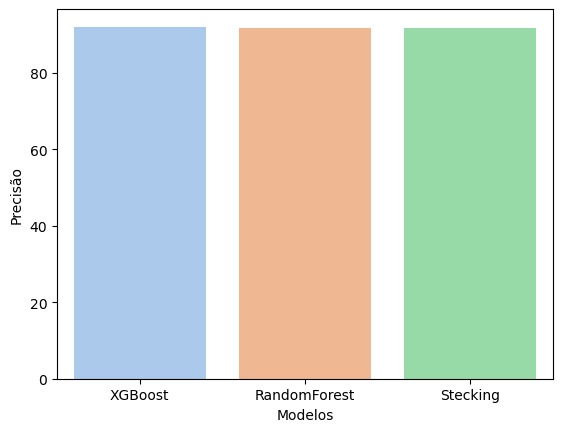

In [148]:
sns.barplot(data=tabela, x='Modelos', y='Precisão', palette='pastel')
plt.show()

# Validação Cruzada

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
xgb_val = cross_val_score(xgb_classifier, X, y, cv=4) * 100
clf_val = cross_val_score(clf, X, y, cv=4) * 100
Stacking_val = cross_val_score(Stacking_Classifier, X, y, cv=4) * 100

In [151]:
tabela_val = pd.DataFrame(data={'Modelos': ['XGB', 'Clf', 'Stacking'],
                                'Val_Metrica': [xgb_val.mean(), clf_val.mean(), Stacking_val.mean()]})

In [152]:
tabela_val

,Modelos,Val_Metrica
0,XGB,95.855490
1,Clf,94.954906
2,Stacking,92.972578


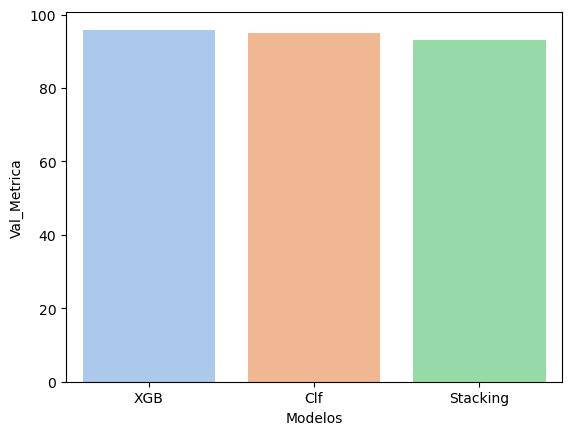

In [153]:
sns.barplot(data=tabela_val, x='Modelos', y='Val_Metrica', palette='pastel')
plt.show()

# Redes Neurais  para classificação

In [154]:
# importando as bases
import tensorflow.keras as tfk
import tensorflow as tf

In [155]:
# Criando a rede neural funcional
tf.random.set_seed(2)

inp = tfk.layers.Input((X_train.shape[1], ))
hid = tfk.layers.Dense(100, activation='elu')(inp)
hid1 = tfk.layers.Dense(100, activation='elu')(hid)
out = tfk.layers.Dense(1, activation='sigmoid')(hid1)
model = tfk.Model(inp, out)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['precision', 'accuracy', 'recall'])

In [156]:
model.summary() # Constituição da minha rede

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,101 (43.36 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Treinando o modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=52)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9506 - loss: 0.3721 - precision: 0.9041 - recall: 0.9649 - val_accuracy: 0.9369 - val_loss: 0.1996 - val_precision: 0.8537 - val_recall: 0.9722
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9612 - loss: 0.1552 - precision: 0.9340 - recall: 0.9604 - val_accuracy: 0.9550 - val_loss: 0.1493 - val_precision: 0.8974 - val_recall: 0.9722
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9626 - loss: 0.1144 - precision: 0.9375 - recall: 0.9604 - val_accuracy: 0.9640 - val_loss: 0.1323 - val_precision: 0.9211 - val_recall: 0.9722
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9635 - loss: 0.0996 - precision: 0.9397 - recall: 0.9604 - val_accuracy: 0.9640 - val_loss: 0.1245 - val_precision: 0.9211 - val_recall: 0.9722
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9646 - loss: 0.0924 - precision: 0.9467 - recall: 0.9557 - val_accuracy: 0.9730 - val_loss: 0.1214 - val_pre

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
import matplotlib as plt

In [160]:
test_acc= model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9372 - loss: 0.1650 - precision: 0.8880 - recall: 0.9278 


In [161]:
tabela2 = pd.DataFrame(test_acc)

In [162]:
tabela2['Metricas'] = ['Loss', 'Acurácia', 'Precisão', 'Recall']
tabela2.columns= ['Valores', 'Metricas']
tabela2 = tabela2[['Metricas', 'Valores']]

In [163]:
tabela2

,Metricas,Valores
0,Loss,0.131965
1,Acurácia,0.918919
2,Precisão,0.954955
3,Recall,0.944444


# Com base a precisão nos acertos e a validação cruzada o modelo a ser colocado em produção é a rede neural, por ter uma precisão de 95% estando a frente do modelos XGBoost com 92% de precisão